# Деревья

In [1]:
%pylab inline
import numpy as np
import pandas as pd
import pylab as plt
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
sns.set(style='whitegrid')

Populating the interactive namespace from numpy and matplotlib


Загрузим датасет и посмотрим на него.

In [2]:
from sklearn.datasets import load_boston

data = load_boston()
X = data.data
y = data.target

Сделаем разбиения для кросс-валидации

In [3]:
from sklearn.model_selection import KFold, cross_val_score
cv = KFold(shuffle=True, random_state=241)

Обучим обычное дерево

In [4]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(random_state=241)
-cross_val_score(regr, X, y, cv=cv, 
                 scoring='neg_mean_squared_error').mean()

29.252426713259563

In [5]:
regr.fit(X, y)
regr.tree_

In [6]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(random_state=241)
cross_val_score(regr, X, y, cv=cv, 
                scoring='r2').mean()

0.63896748450608

Теперь переберем разные параметры для дерева

In [7]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(DecisionTreeRegressor(random_state=241),
                  param_grid={
                      'max_features': ['auto', 'log2', 'sqrt'], # the number of features to consider when looking for the best split
                      'max_depth': [2, 4, 6, 8, 10, 20, 50],
                      'min_samples_leaf': [1, 4, 8, 32],
                  },
                  cv=cv,
                  scoring='r2')
gs.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=241, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=241),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 20, 50],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'min_samples_leaf': [1, 4, 8, 32]},
             scoring='r2')

In [8]:
cv_grid = pd.DataFrame(gs.cv_results_['params'])

cv_grid['mean_test_score'] = gs.cv_results_['mean_test_score']

In [9]:
cv_grid.head()

,max_depth,max_features,min_samples_leaf,mean_test_score
0,2,auto,1,0.628959
1,2,auto,4,0.628959
2,2,auto,8,0.628959
3,2,auto,32,0.592873
4,2,log2,1,0.405284


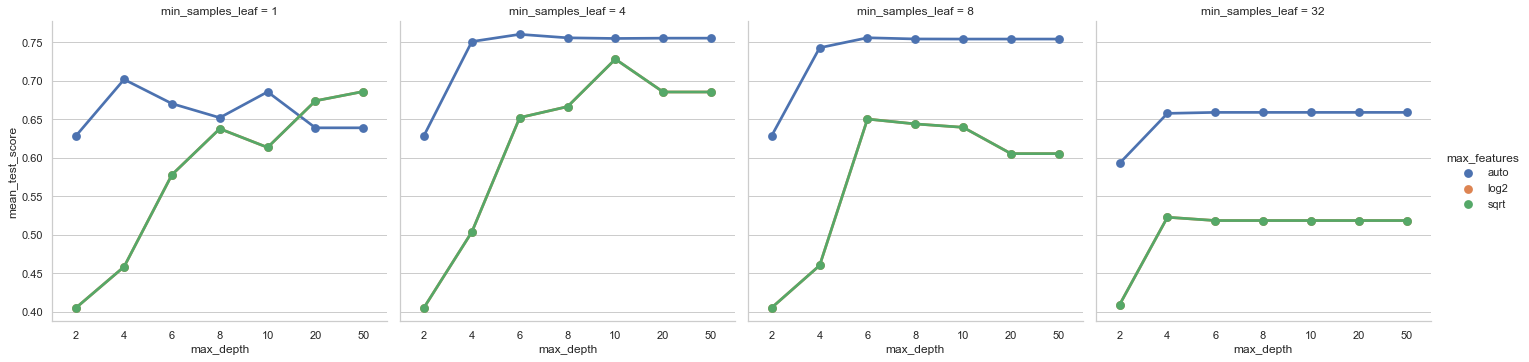

In [10]:
sns.catplot(x='max_depth', y='mean_test_score', data=cv_grid,
            col='min_samples_leaf', hue='max_features',
            kind='point')

In [11]:
gs.best_score_

0.7604838117717478

In [12]:
gs.best_params_

{'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 4}

## Oblivious Decision Tree

![](https://qph.fs.quoracdn.net/main-qimg-5274e48e1766230e22e3cdd7e83019ce)

* Один предикат вида $[x_j < t]$ для каждого уровня.
* Слабее обычных деревьев, препятствуют переобучению.
* Гораздо эффективнее произвольных деревьев.
* Достаточно хранить последовательность порогов и номеров признаков.
* Каждому листу можно сопоставить уникальную последовательность 0 и 1, которое соответствует натуральному числу (индекс). Можно хранить листья как массив и обращать к ним по индексу.

![](https://qph.fs.quoracdn.net/main-qimg-c8457d5d20273f0368f801d6593aa667)